# PS1-Q1: Budget Visualization

**Your Name:**Haixiang Fang 

**People I discussed this question with:**None 

# Preamble: Loading the Data
The below code loads the relevant budget data for you and places it in a dataframe. This should show you some basic operations for loading data and well as how to manipulate the data frame entries and pull values from a table. Feel free to mess around with it to help understand what the various features do.

In [141]:
import numpy as np
import pandas as pd
data_url = 'https://raw.githubusercontent.com/WhiteHouse/budgetdata/2016/data/outlays.csv'
data = pd.io.parsers.read_csv(data_url,
                             usecols = [0,1,3,5,8,9,67])
# convert the 2016 data to a number
data['2016'] = data['2016'].str.replace(',', '')
data['2016']=data['2016'].apply(pd.to_numeric)
# The 2016 data is actually in thousands of dollars, so correct for this
data['2016']=data['2016']*1000

In [142]:
data

,Agency Code,Agency Name,Bureau Name,Account Name,Subfunction Title,BEA Category,2016
0,1,Legislative Branch,Legislative Branch,"Receipts, Central fiscal operations",Central fiscal operations,Mandatory,0
1,1,Legislative Branch,Legislative Branch,"Receipts, Central fiscal operations",Other interest,Net interest,0
2,1,Legislative Branch,Legislative Branch,Charges for services to trust funds,Central fiscal operations,Mandatory,0
3,1,Legislative Branch,Senate,Senate,Legislative functions,Discretionary,0
4,1,Legislative Branch,Senate,"Compensation of Members, Senate",Legislative functions,Mandatory,24000000
5,1,Legislative Branch,Senate,Mileage of the Vice President and Senators,Legislative functions,Discretionary,0
6,1,Legislative Branch,Senate,"Expense allowances of the Vice President, Pres...",Legislative functions,Discretionary,0
7,1,Legislative Branch,Senate,Representation allowances for the Majority and...,Legislative functions,Discretionary,0
8,1,Legislative Branch,Senate,"Salaries, Officers and Employees",Legislative functions,Discretionary,186000000
9,1,Legislative Branch,Senate,Payments to widows and heirs of deceased membe...,Legislative functions,Mandatory,0


In [143]:
# 2016 Federal Expeditures were ~$3.99 Trillion, so this should match that
import locale
locale.setlocale( locale.LC_ALL, '' )
total_budget = sum(data['2016'])
print('Total Expenditures: ',
      locale.currency( total_budget, grouping=True ))

Total Expenditures:  $3,999,467,000,000.00


In [144]:
# We only want data points that were discretionary and non-zero
non_zero = data['2016']>0
discretionary = data['BEA Category']=='Discretionary'

In [145]:
relevant_data = data[discretionary & non_zero]

In [146]:
relevant_data

,Agency Code,Agency Name,Bureau Name,Account Name,Subfunction Title,BEA Category,2016
8,1,Legislative Branch,Senate,"Salaries, Officers and Employees",Legislative functions,Discretionary,186000000
10,1,Legislative Branch,Senate,Miscellaneous Items,Legislative functions,Discretionary,21000000
11,1,Legislative Branch,Senate,Secretary of the Senate,Legislative functions,Discretionary,8000000
12,1,Legislative Branch,Senate,Sergeant at Arms and Doorkeeper of the Senate,Legislative functions,Discretionary,134000000
13,1,Legislative Branch,Senate,Inquiries and Investigations,Legislative functions,Discretionary,134000000
15,1,Legislative Branch,Senate,Senators' Official Personnel and Office Expens...,Legislative functions,Discretionary,441000000
25,1,Legislative Branch,Senate,Office of the Legislative Counsel of the Senate,Legislative functions,Discretionary,6000000
34,1,Legislative Branch,Senate,Senate Items,Legislative functions,Discretionary,2000000
40,1,Legislative Branch,House of Representatives,Salaries and Expenses,Legislative functions,Discretionary,1206000000
58,1,Legislative Branch,Joint Items,Joint Economic Committee,Legislative functions,Discretionary,4000000


In [147]:
relevant_data[['Agency Name','2016']]

,Agency Name,2016
8,Legislative Branch,186000000
10,Legislative Branch,21000000
11,Legislative Branch,8000000
12,Legislative Branch,134000000
13,Legislative Branch,134000000
15,Legislative Branch,441000000
25,Legislative Branch,6000000
34,Legislative Branch,2000000
40,Legislative Branch,1206000000
58,Legislative Branch,4000000


# Question 1:
Use any plotting library you would like to answer the following question:
"Of all of the different agencies, which contributed the largest discretionary expenditures to the overall 2016 federal budget?"

Again, remember to customize the plots programmatically so as to incorporate what you have learned regarding the data to ink ratio.

In [148]:
# Insert you code here or in cells below.
relevant=relevant_data.groupby(['Agency Name']).sum()

In [149]:
relevant

,Agency Code,2016
Agency Name,,
Access Board,310,7000000
Administrative Conference of the United States,302,3000000
Advisory Council on Historic Preservation,306,6000000
Appalachian Regional Commission,618,85000000
Broadcasting Board of Governors,1028,743000000
Chemical Safety and Hazard Investigation Board,510,12000000
Commission of Fine Arts,646,5000000
Commission on Civil Rights,326,9000000
Committee for Purchase from People Who Are Blind or Severely Disabled,338,5000000


In [150]:
relevant.columns.values

array(['Agency Code', '2016'], dtype=object)

In [151]:
relevant=relevant.sort_values(by=['2016'])
relevant

,Agency Code,2016
Agency Name,,
Recovery Accountability and Transparency Board,539,1000000
Public Company Accounting Oversight Board,526,1000000
Other Commissions and Boards,505,1000000
Office of the Federal Coordinator for Alaska Natural Gas Transportation Projects,534,1000000
National Credit Union Administration,415,2000000
Administrative Conference of the United States,302,3000000
National Council on Disability,413,3000000
Marine Mammal Commission,387,3000000
United States Interagency Council on Homelessness,376,4000000


In [152]:
relevant=relevant.reset_index()

In [153]:
relevant.head()

,Agency Name,Agency Code,2016
0,Recovery Accountability and Transparency Board,539,1000000
1,Public Company Accounting Oversight Board,526,1000000
2,Other Commissions and Boards,505,1000000
3,Office of the Federal Coordinator for Alaska N...,534,1000000
4,National Credit Union Administration,415,2000000


In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

In [155]:
relevant=relevant.tail(12)
relevant

,Agency Name,Agency Code,2016
89,Department of Transportation,1239,20542000000
90,International Assistance Programs,7544,26248000000
91,Department of Agriculture,380,26480000000
92,Department of Justice,396,28909000000
93,Department of Energy,665,30954000000
94,Department of State,420,32537000000
95,Department of Homeland Security,1344,48140000000
96,Department of Housing and Urban Development,1075,53101000000
97,Department of Education,612,70132000000
98,Department of Veterans Affairs,551,71528000000


In [156]:
relevant['2016']=relevant['2016'].map(lambda x:x/1000000000)
relevant

,Agency Name,Agency Code,2016
89,Department of Transportation,1239,20.542
90,International Assistance Programs,7544,26.248
91,Department of Agriculture,380,26.480
92,Department of Justice,396,28.909
93,Department of Energy,665,30.954
94,Department of State,420,32.537
95,Department of Homeland Security,1344,48.140
96,Department of Housing and Urban Development,1075,53.101
97,Department of Education,612,70.132
98,Department of Veterans Affairs,551,71.528


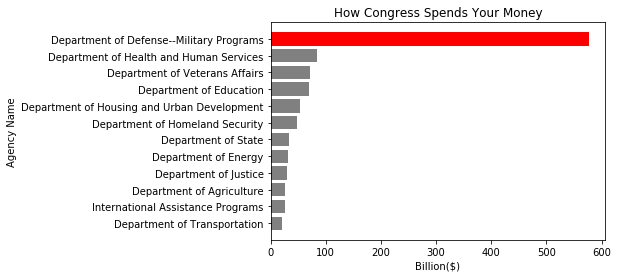

In [157]:
a=np.ones(12)
a=['grey' if x==1 else x for x in a]
a[11]='red'
X=relevant['Agency Name']
Y=relevant['2016']
plt.barh(X,Y,color=a)
plt.xlabel('Billion($)')
plt.ylabel('Agency Name')
plt.title('How Congress Spends Your Money')
plt.show()
